In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [58]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Genres
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df['Genres'] = np.where(df['Gender'] == 'Male', 1, 2)

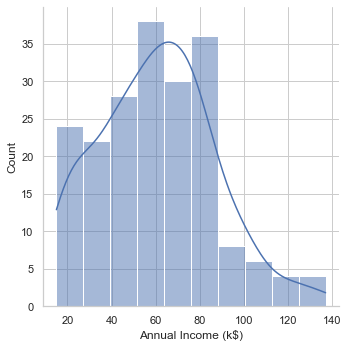

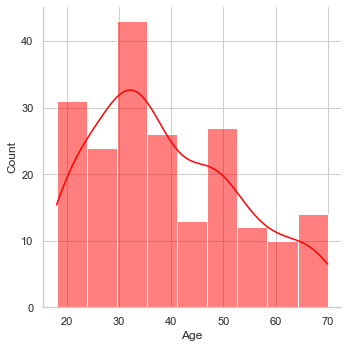

In [25]:
sns.displot(df['Annual Income (k$)'], color='b', kde=True)
plt.show()

sns.displot(df['Age'], color = 'red', kde=True)
plt.show()

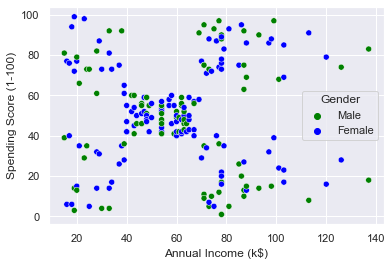

In [57]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'], palette=['green', 'blue'])
plt.show()

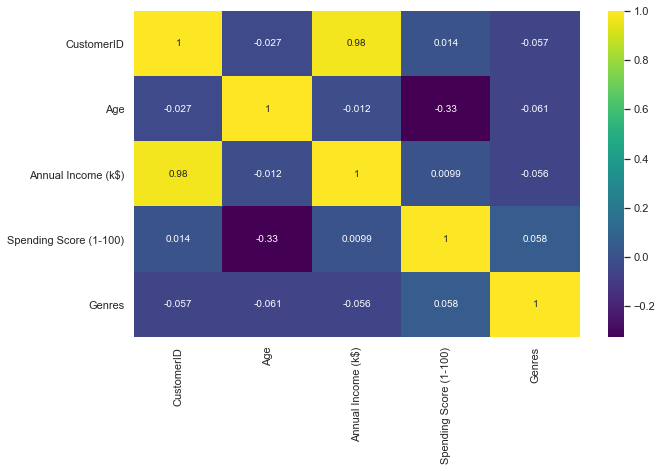

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

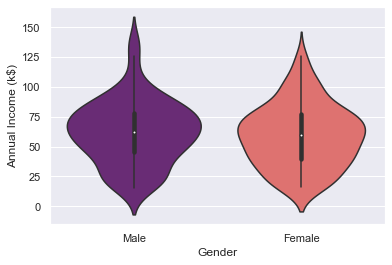

In [67]:
sns.violinplot(x=df['Gender'], y=df['Annual Income (k$)'], palette='magma')
plt.show()

In [68]:
X = df.iloc[:, [3, 4]].values

In [70]:
from sklearn.cluster import KMeans

wcss = list()
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


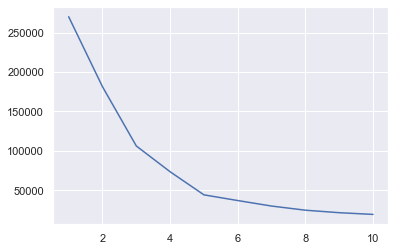

In [76]:
sns.lineplot(x=range(1, 11), y=wcss)
plt.show()

In [78]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_means = kmeans.fit_predict(X)

In [81]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

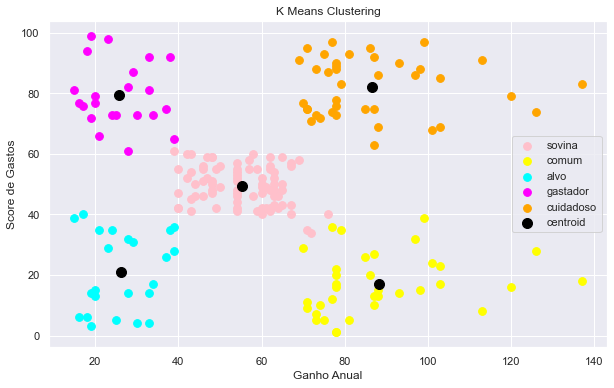

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange']
label = ['sovina', 'comum', 'alvo', 'gastador', 'cuidadoso']

for i, color, label in zip(np.unique(y_means), colors, label):
    ax.scatter(X[y_means == i, 0], X[y_means == i, 1], s=60, c=color, label=label)
    
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroid')
plt.title('K Means Clustering')
plt.xlabel('Ganho Anual')
plt.ylabel('Score de Gastos')
ax.legend()
plt.show()